In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi
e = np.e

In [91]:
# #Output
# outputfile = ./

# #Evolution
# expansion = true
# evolver = VV2

# #Lattice
# N = 32
# dt = 0.01
# kIR = 0.75

# #Times
# tOutputFreq = 0.1
# tOutputInfreq = 1
# tMax = 300


# #Spectra options
# PS_type = 1
# PS_version = 1

# #GWs
# GWprojectorType = 1
# withGWs = false

# #IC
# # kCutOff = 4
# initial_amplitudes = 5.6964e18 # homogeneous amplitudes in GeV
# initial_momenta = -4.86735e30 # homogeneous amplitudes in GeV2

# seed = 1234
# #Model Parameters
# lambda = 9e-14
# q = 100


In [92]:
path = '../build/'

# Load data
energies = pd.read_csv(path + 'average_energies.txt', sep='    ', header=None, engine='python')
energies.columns = ['eta','K','G', 'V', 'rho']

energy_cons = pd.read_csv(path + 'average_energy_conservation.txt', sep='    ', header=None, engine='python')
energy_cons.columns = ['eta','deltaE','lhs','rhs']

scalar0 = pd.read_csv(path + 'average_scalar_0.txt', sep='    ', header=None, engine='python')
scalar0.columns = ['eta','phi','phi_prime', 'phi2', 'phi_prime2', 'rms_phi', 'rms_phi_prime']

scale_factor = pd.read_csv(path + 'average_scale_factor.txt', sep='    ', header=None, engine='python')
scale_factor.columns = ['eta','a','a_prime', 'H']

spectra_scalar0 = pd.read_csv(path + 'spectra_scalar_0.txt', sep=' ', header=None, engine='python')
spectra_scalar0.columns = ['k','S_phi','S_phi_prime','n_k']

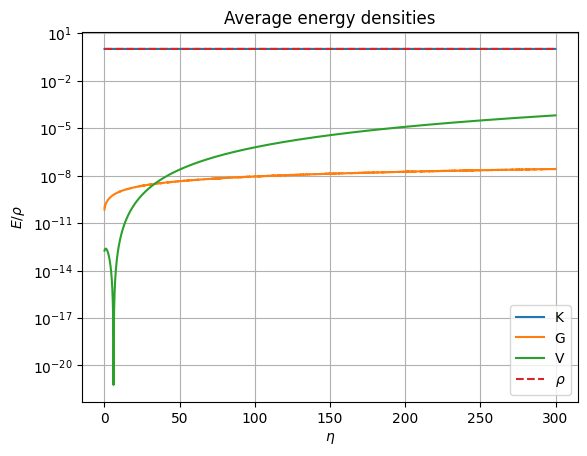

In [93]:
plt.plot(energies['eta'], energies['K']/energies['rho'], label='K')
plt.plot(energies['eta'], energies['G']/energies['rho'], label='G')
plt.plot(energies['eta'], energies['V']/energies['rho'], label='V')
plt.plot(energies['eta'], energies['rho']/energies['rho'],'--', label=r'$\rho$')

plt.title('Average energy densities')
plt.ylabel(r'$E/\rho$')
plt.xlabel(r'$\eta$')

plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

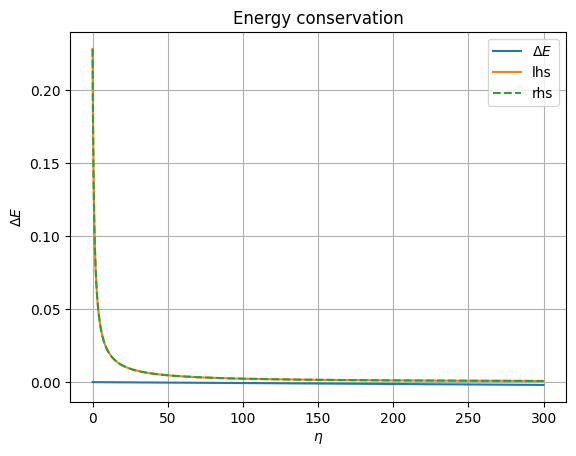

In [94]:
plt.plot(energy_cons['eta'], energy_cons['deltaE'], label=r'$\Delta E$')
plt.plot(energy_cons['eta'], energy_cons['lhs'], label='lhs')
plt.plot(energy_cons['eta'], energy_cons['rhs'], '--', label='rhs')

plt.title('Energy conservation')
plt.ylabel(r'$\Delta E$')
plt.xlabel(r'$\eta$')
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

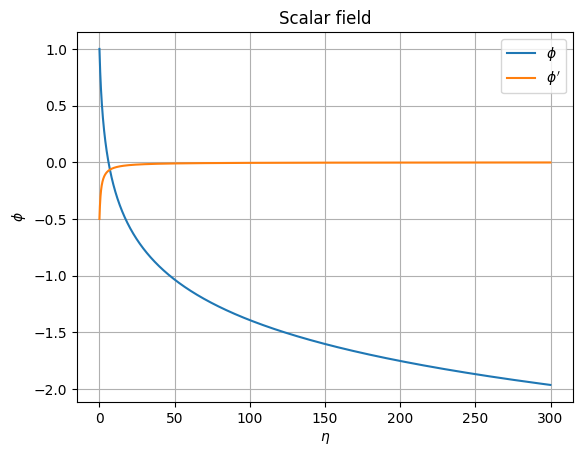

In [95]:
plt.plot(scalar0['eta'], scalar0['phi'], label=r'$\phi$')
plt.plot(scalar0['eta'], scalar0['phi_prime'], label=r'$\phi^\prime$')


plt.title('Scalar field')
plt.ylabel(r'$\phi$')
plt.xlabel(r'$\eta$')

plt.legend()
plt.grid()
plt.show()

# plt.plot(scalar0['eta'], scalar0['phi2'], label=r'$\phi^2$')
# plt.plot(scalar0['eta'], scalar0['phi_prime2'], label=r'$\phi^{\prime 2}$')

# plt.title('Scalar field squared')
# plt.ylabel(r'$\phi\prime$')
# plt.xlabel(r'$\eta$')

# plt.legend()
# plt.grid()
# plt.show()

# plt.yscale('log')


In [98]:
file = np.loadtxt(path+'spectra_scalar_0.txt')
step = 27
tmax = 300
data = np.zeros((tmax,step,2))
for i in range(tmax):
    data[i,::,0] = file[step*i:step*(i+1),0]
    data[i,::,1] = file[step*i:step*(i+1),1]
data[0]

array([[7.50000000e-01, 1.48047919e-15],
       [1.50000000e+00, 5.50977105e-15],
       [2.25000000e+00, 8.98954062e-15],
       [3.00000000e+00, 2.24884697e-14],
       [3.75000000e+00, 4.27584609e-14],
       [4.50000000e+00, 4.22628671e-14],
       [5.25000000e+00, 5.95404256e-14],
       [6.00000000e+00, 7.75940826e-14],
       [6.75000000e+00, 1.13652148e-13],
       [7.50000000e+00, 1.35832323e-13],
       [8.25000000e+00, 1.45991981e-13],
       [9.00000000e+00, 1.83039026e-13],
       [9.75000000e+00, 2.14267462e-13],
       [1.05000000e+01, 2.49546448e-13],
       [1.12500000e+01, 2.59096272e-13],
       [1.20000000e+01, 3.31624704e-13],
       [1.27500000e+01, 3.13125987e-13],
       [1.35000000e+01, 2.83355550e-13],
       [1.42500000e+01, 2.31358734e-13],
       [1.50000000e+01, 1.92387063e-13],
       [1.57500000e+01, 1.68464839e-13],
       [1.65000000e+01, 1.10820626e-13],
       [1.72500000e+01, 6.60474832e-14],
       [1.80000000e+01, 3.56225946e-14],
       [1.875000

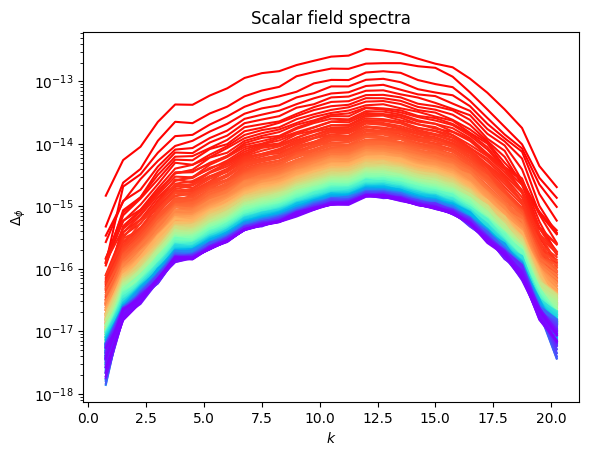

In [102]:
# Crear un colormap arcoíris
cmap = plt.get_cmap('rainbow')

# Graficar cada línea con un color diferente
for i in range(300):
    color = cmap((300-i) / 300)  # Obtener un color del colormap
    plt.plot(data[i, :, 0], data[i, :, 1], color=color)

plt.title('Scalar field spectra')
plt.ylabel(r'$\Delta_\phi$')
plt.xlabel(r'$k$')

plt.yscale('log')
plt.show()